# KLEJ Allegro reviews dataset

In [1]:
import datasets
import pandas as pd
import seaborn as sns

allegro_dataset = datasets.load_dataset('allegro/klej-allegro-reviews')
df_train = allegro_dataset['train'].to_pandas()
df_val = allegro_dataset['validation'].to_pandas()
df_test = allegro_dataset['test'].to_pandas()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
Using custom data configuration allegro--klej-allegro-reviews-214dafb30a55202b
Reusing dataset csv (/home/joanna/.cache/huggingface/datasets/csv/allegro--klej-allegro-reviews-214dafb30a55202b/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
df_train.head()

,text,rating
0,Jako do ceny dobra. Przyssawka mogłaby być lep...,3.0
1,Na słuchawkę czekałam spory czas a po zadzwoni...,1.0
2,"Czajnik na pierwszy rzut oka wygląda ok, ale n...",1.0
3,"Bardzo fajny czajnik, na pewno nie gorszy od m...",4.0
4,Pomysł na produkt (uchwyt na kierownicę) bardz...,2.0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9577 entries, 0 to 9576
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    9577 non-null   object 
 1   rating  9577 non-null   float64
dtypes: float64(1), object(1)
memory usage: 149.8+ KB


In [4]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    1002 non-null   object 
 1   rating  1002 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df_test

,text,rating
0,"1. Ładowanie bezprzewodowe działa, ale słabo. ...",4.0
1,Uchwyt dobrze trzyma telefon. Ramiona mają spo...,4.0
2,"""Gdyby nie problem jeśli w pobliżu znajduje s...",2.0
3,Wypróbowałam na 2x 5kg pomidorów i grubszym si...,5.0
4,"""Produkt w pełni spełnia moje oczekiwania. Oba...",5.0
...,...,...
1001,"Super sprzęt, ale wymaga wiedzy i trochę kombi...",5.0
1002,Nie mogę teraz stwierdzić jednoznacznie stanu ...,4.0
1003,"Zanim kupiłem tą baterie, miałem okazje przeko...",3.0
1004,"power bank porażka miał mieć 20000mah , co pow...",1.0


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    1006 non-null   object 
 1   rating  1006 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [11]:
# from src import DATA_DIR
#
# DATA_DIR = DATA_DIR.joinpath('klej_ar')
#
# df_train.to_csv(DATA_DIR.joinpath('train.tsv'), sep='\t', index=False)
# df_val.to_csv(DATA_DIR.joinpath('dev.tsv'), sep='\t', index=False)
# df_test.to_csv(DATA_DIR.joinpath('test.tsv'), sep='\t', index=False)

### Concat all splits

In [7]:
df_train['split'] = 'train'
df_val['split'] = 'val'
df_test['split'] = 'test'
df_all = pd.concat([df_train, df_val, df_test], ignore_index=True)

### Label distribution

Rating labels: [3. 1. 4. 2. 5.]


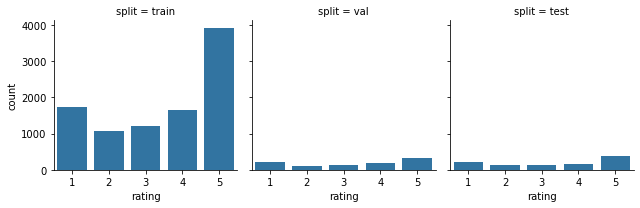

In [8]:
print(f'Rating labels: {df_all.rating.unique()}')

g = sns.FacetGrid(df_all, col="split")
g.map(sns.countplot, 'rating', order=[1, 2, 3, 4, 5])

### Text length distribution

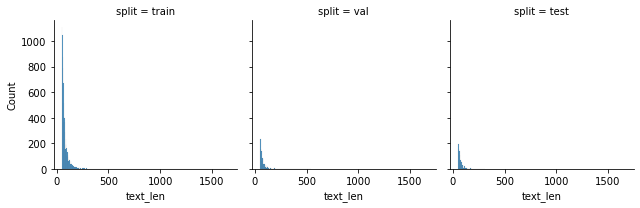

In [9]:
df_all['text_len'] = df_all.text.apply(lambda x: len(x.split(' ')))

g = sns.FacetGrid(df_all, col="split")
g.map(sns.histplot, 'text_len')

In [10]:
df_all.describe()

,rating,text_len
count,11585.000000,11585.000000
mean,3.489167,79.544411
std,1.544989,42.450812
min,1.000000,51.000000
25%,2.000000,57.000000
50%,4.000000,67.000000
75%,5.000000,86.000000
max,5.000000,1667.000000


### Tokenized texts length

In [12]:
from transformers import AutoTokenizer

HUGGINGFACE_MODEL_NAME = 'allegro/herbert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(HUGGINGFACE_MODEL_NAME, do_lower_case=True)

texts = df_all['text'].values.tolist()

text_tokenized = tokenizer(
    texts,
    add_special_tokens=True,
    return_token_type_ids=False,
    return_attention_mask=False,
    truncation=False,
    padding=False,
    return_length=True
)
text_tokens = text_tokenized['input_ids']
lengths = text_tokenized['length']

df_all['tok_len'] = lengths
df_all.head()

Token indices sequence length is longer than the specified maximum sequence length for this model (1669 > 512). Running this sequence through the model will result in indexing errors


,text,rating,split,text_len,tok_len
0,Jako do ceny dobra. Przyssawka mogłaby być lep...,3.0,train,52,80
1,Na słuchawkę czekałam spory czas a po zadzwoni...,1.0,train,113,143
2,"Czajnik na pierwszy rzut oka wygląda ok, ale n...",1.0,train,69,105
3,"Bardzo fajny czajnik, na pewno nie gorszy od m...",4.0,train,62,94
4,Pomysł na produkt (uchwyt na kierownicę) bardz...,2.0,train,76,108


In [13]:
df_all.describe()

,rating,text_len,tok_len
count,11585.000000,11585.000000,11585.000000
mean,3.489167,79.544411,111.564350
std,1.544989,42.450812,88.486718
min,1.000000,51.000000,2.000000
25%,2.000000,57.000000,83.000000
50%,4.000000,67.000000,99.000000
75%,5.000000,86.000000,127.000000
max,5.000000,1667.000000,4202.000000


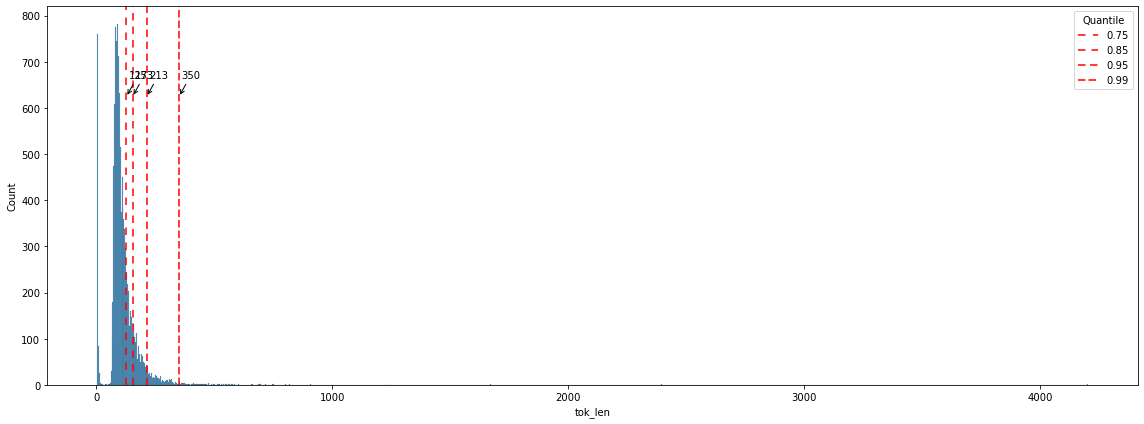

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6))

sns.histplot(x='tok_len', data=df_all, ax=ax)
max_val = max([p.get_height() for p in ax.patches])
for q, ls in zip([0.75, 0.85, 0.95, 0.99], [(0, (5, 5)), (0, (5, 4)), (0, (5, 3)), (0, (5, 2))]):
    qv = int(df_all['tok_len'].quantile(q))
    ax.axvline(qv, color='red', ls=ls, lw=1.5, label=q)
    ax.annotate(
        qv,
        xy=(qv, max_val * 0.8),
        xytext=(qv + 9, max_val * 0.85),
        arrowprops=dict(arrowstyle="->", color='black'),
    )

ax.legend(title='Quantile')

fig.tight_layout()

## Convert to texts for Morfodita tagger

In [7]:
from src.settings import DATA_DIR

ALLEGRO_REVIEWS_DIR = DATA_DIR.joinpath('klej_ar')

In [8]:
def split_texts_to_folder(df: pd.DataFrame, split: str):
    dir = ALLEGRO_REVIEWS_DIR.joinpath(f'{split}')
    dir.mkdir(exist_ok=True, parents=True)

    texts = df['text'].values

    for idx, text in enumerate(texts):
        path = dir.joinpath(f'{idx}.txt')
        with path.open(mode='w') as f:
            f.write(text)

In [9]:
split_texts_to_folder(df_train, split='train')

In [10]:
split_texts_to_folder(df_val, split='dev')
split_texts_to_folder(df_test, split='test')